> # 서울시 지하철 혼잡도 분석
- 학번: 2024105232
- 학과: 소프트웨어융합학과
- 학년: 1
- 이름: 고시온

> # 1. 주제
+ 주제: 서울시 지하철 혼잡도 분석
- 선정 이유: 지하철은 도심에서 많은 교통량을 해소시켜준다. 때문에 지하철을 탈 때 사람이 많아 불편한 경험을 자주 하게 된다. 지하철 혼잡도에 영향을 미치는 요소들을 파악하고 어떤점을 개선하면 혼잡도가 줄어들까 생각해보기 위해 주제를 선정하게 되었다.

> # 2. 가설 설정
- 출근 시간대의 열차 운행시격이 늘어날수록 혼잡도가 늘어날 것이다.
+ 표정 속도가 커질수록 혼잡도가 줄어들 것이다.
- 평일 운행 횟수가 커질수록 혼잡도가 줄어들 것이다.

> # 3. 데이터
+ [서울교통공사_열차운행현황](https://www.data.go.kr/data/3052776/fileData.do): 1-8호선에 대한 운행정보 등이 정리된 데이터
- [서울교통공사_지하철혼잡도정보](http://data.seoul.go.kr/dataList/OA-12928/F/1/datasetView.do): 1-8호선에 대한 시간대별 혼잡도 데이터

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 데이터 불러오기
df_train= pd.read_csv("./data/열차운행.csv", encoding='euc-kr')
df_jam= pd.read_csv("./data/혼잡도.csv", encoding='euc-kr')

(1) 서울시 열차 운행 현황 데이터(2023)
- (표정속도) 호선별 열차의 운행거리을 소요시간으로 나눈 값(km/h)
+ (운행시격_출근) 출근시간대(07:00~09:00) 호선별 열차의 운행간격을 나타내는 값(분)
- (운행횟수_평일) 평일 호선별 열차의 횟수를 나타내는 값

In [3]:
df_train

,연번,호선,구간,영업거리,역수,소요시간,보유차량칸수,열차편성수,편성당칸수,표정속도,열차주행거리_평일,운행시격_출근,운행시격_평시,운행횟수_평일,운행횟수_휴일
0,1,1호선,서울~청량리,7.8,10,18,160,16,10,26,5092,3,5,589(S88/K501),535(S78/K457)
1,2,2호선,성수~성수[성수지선/신정지선],48.8[5.4/6.0],43[4/3],90[9/11],750[20/24],75[5/4],10[4/6],32.5[36.0/32.7],23728[1249.8/1344.2],2.5[7.0/10.0],5.5[10.0/10.0],528[226/220],424[208/212]
2,3,3호선,지축~오금,38.2,34,67.5,490,49,10,34,14236.4,3,6.5,407(S299/K108),369(S282/K87)
3,4,4호선,진접~남태령,45.4,29,68,520,52,10,40.1,15817.2,2.5,5.5,476(S325/K151),408(S264/K144)
4,5,5호선,방화~하남검단산/마천,59.8,56,108.5,640,80,8,33.1,20580.7,2.5,6.5,428,344
5,6,6호선,응암순환~신내,36.3,39,75,312,39,8,29,10724.4,4,8,340,263
6,7,7호선,장암~온수,46.9,42,87,592,74,8,32.3,18447.7,2.5,6,402,328
7,8,8호선,암사~모란,17.7,18,32.5,120,20,6,32.7,5193.8,4.5,8.5,292,252


(2) 서울시 시간대별 열차 혼잡도 데이터(2023)
- (혼잡도) 열차 내부의 혼잡한 정도. 정원 대비 승차인원으로, 승차인원과 좌석수가 일치할 경우 혼잡도 34%로 산정함.(%)

In [4]:
df_jam

,연번,요일구분,호선,역번호,출발역,상하구분,5시30분,6시00분,6시30분,7시00분,...,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분,00시00분,00시30분,01시00분
0,1,평일,1,150,서울역,상선,7.9,17.7,18.4,32.6,...,17.9,19.5,15.6,15.5,18.7,12.4,9.0,9.3,1.8,0.0
1,2,평일,1,150,서울역,하선,11.6,11.6,13.2,22.9,...,38.1,35.2,30.9,42.4,29.0,20.5,13.3,5.8,0.0,0.0
2,3,평일,1,151,시청,상선,7.2,14.5,15.1,25.8,...,22.6,24.0,19.3,19.9,22.2,16.5,12.4,6.5,2.2,0.0
3,4,평일,1,151,시청,하선,9.3,10.1,14.8,21.6,...,34.6,31.6,30.4,33.0,24.3,18.1,11.5,3.9,0.5,0.0
4,5,평일,1,152,종각,상선,7.0,12.7,10.5,17.5,...,27.7,31.9,25.3,27.5,28.3,21.5,15.1,7.4,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,1652,일요일,8,2826,수진,하선,9.8,4.3,3.4,2.7,...,1.9,3.0,1.8,1.6,1.1,1.0,0.7,0.3,NaN,NaN
1652,1653,일요일,8,2827,모란,상선,1.2,0.8,2.5,2.1,...,5.7,6.5,6.2,3.7,5.0,3.4,2.9,NaN,NaN,NaN
1653,1654,일요일,8,2827,모란,하선,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1654,1655,일요일,8,2828,남위례,상선,10.9,6.8,9.2,9.0,...,8.0,7.0,5.9,5.2,5.4,3.2,1.7,NaN,NaN,NaN


> # 4. 분석
### 4-1. 출근 시간대의 열차 운행시격이 늘어날 수록 혼잡도가 늘어날 것이다.

(1) 운행 시격 추출

In [5]:
Train_Interval= df_train['운행시격_출근'].tolist()
Train_Interval[1]= '2.5'
Train_Interval= [float(i) for i in Train_Interval]

(2) 각 호선의 러시 아워(07:00~09:00)일 때 평균 혼잡도 계산

In [6]:
# 호선별 인덱스 범위 정의
line_ranges = {
    '1호선': (0, 19),
    '2호선': (20, 121),
    '3호선': (122, 189),
    '4호선': (190, 241),
    '5호선': (242, 353),
    '6호선': (354, 431),
    '7호선': (432, 515),
    '8호선': (416, 5151)
}

Average_Congestion_RH = []

# 각 호선의 출근시간대 평균 혼잡도 계산
for line, (start, end) in line_ranges.items():
    jam = df_jam.loc[start:end, '7시00분':'9시00분']
    jam['average'] = jam.mean(axis=1)
    Average_Congestion_RH.append(jam['average'].mean(axis=0))

(3) 운행시격과 평균 혼잡도를 하나의 데이터프레임으로 저장

In [7]:
df_1= pd.DataFrame({
    'Train_Interval': Train_Interval,
    'Average_Congestion_RH': Average_Congestion_RH
})

(4) 운행 시격(x)에 따른 평균 혼잡도(y)의 관계를 그래프로 출력

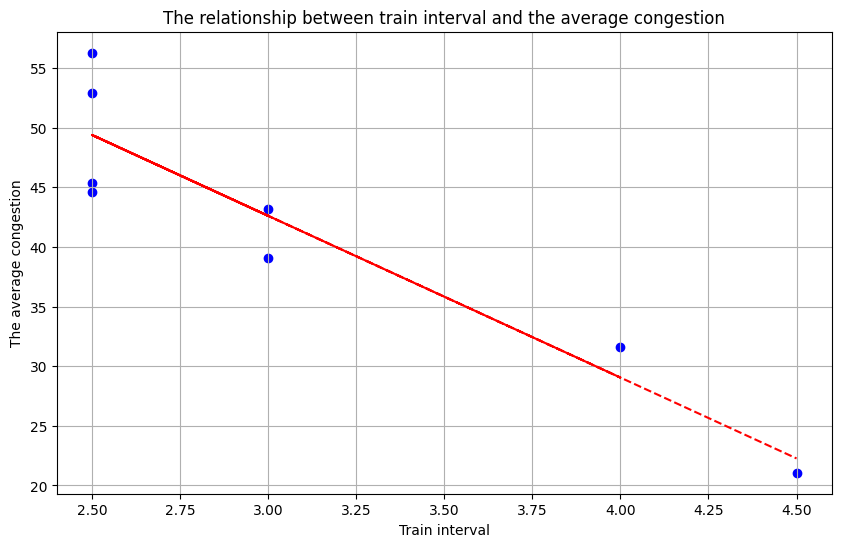

In [8]:
plt.figure(figsize=(10, 6))

# 점 그래프
plt.scatter(df_1['Train_Interval'], df_1['Average_Congestion_RH'], color='blue', marker='o')

# 추세선
z = np.polyfit(df_1['Train_Interval'], df_1['Average_Congestion_RH'], 1)
p = np.poly1d(z)
plt.plot(df_1['Train_Interval'], p(df_1['Train_Interval']), "r--")

plt.title('The relationship between train interval and the average congestion')
plt.xlabel('Train interval')
plt.ylabel('The average congestion')
plt.grid(True)
plt.show()

분석: 운행시격(운행하는 열차 사이 시간 차이)이 높은 열차일수록 자주 오지않으니 교통량 해소에 영향을 미칠 것 이라 생각해 가설을 설정했다. 하지만 운행시격이 클수록 출근시간대의 평균 혼잡도는 오히려 낮은 추세를 보였다.

### 4-2. 표정 속도가 커질수록 혼잡도가 줄어들 것이다.

(1) 표정속도 추출

In [9]:
Average_Speed= df_train['표정속도'].tolist()
Average_Speed[1]= '32.5'
Average_Speed= [float(i) for i in Average_Speed]

(2) 각 호선의 평균 혼잡도 계산

In [10]:
Average_Congestion = []

# 각 호선의 평균 혼잡도 계산
for line, (start, end) in line_ranges.items():
    jam = df_jam.loc[start:end, '5시30분':'01시00분']
    jam['average'] = jam.mean(axis=1)
    Average_Congestion.append(jam['average'].mean(axis=0))

(3) 표정속도와 평균 혼잡도를 하나의 데이터프레임으로 저장

In [11]:
df_2= pd.DataFrame({
    'Average_Speed': Average_Speed,
    'Average_Congestion': Average_Congestion
})

(4) 표정속도(x)에 따른 평균혼잡도(y)의 관계를 그래프로 출력

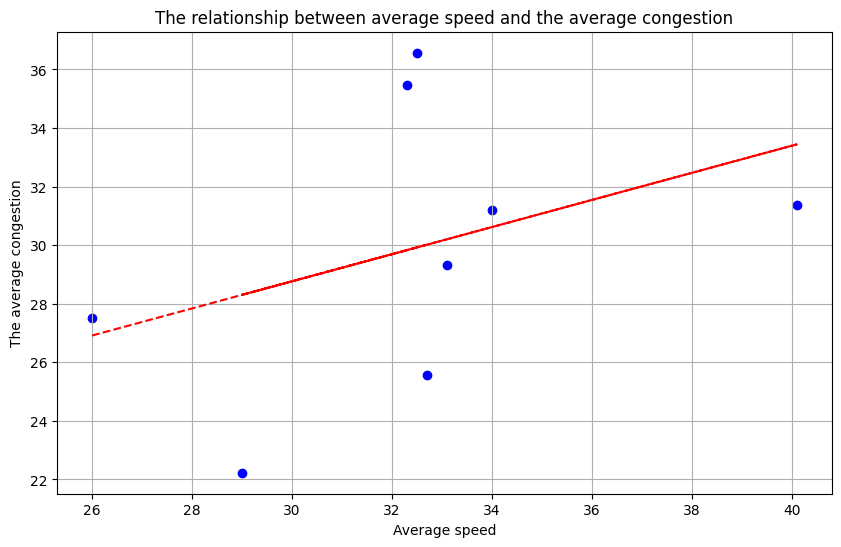

In [12]:
plt.figure(figsize=(10, 6))

# 점 그래프
plt.scatter(df_2['Average_Speed'], df_2['Average_Congestion'], color='blue', marker='o')

# 추세선
z = np.polyfit(df_2['Average_Speed'], df_2['Average_Congestion'], 1)
p = np.poly1d(z)
plt.plot(df_2['Average_Speed'], p(df_2['Average_Speed']), "r--")

plt.title('The relationship between average speed and the average congestion')
plt.xlabel('Average speed')
plt.ylabel('The average congestion')
plt.grid(True)
plt.show()

분석: 표정속도(운행거리를 소요시간으로 나눈 값)이 높은 열차일수록 빠르게 교통량 해소할 것 이라 생각해 가설을 설정했다. 하지만 표정속도와 혼잡도는 양의 상관관계를 가지는 듯한 추세를 보이지만 거의 무관한 그래프 모양을 보였다.

### 4-3. 평일 운행 횟수가 커질수록 혼잡도가 줄어들 것이다.

(1) 평일 운행횟수 추출

In [13]:
Number_Operaion= df_train['운행횟수_평일'].tolist()
Number_Operaion[0]= '589'
Number_Operaion[1]= '528'
Number_Operaion[2]= '407'
Number_Operaion[3]= '476'
Number_Operaion= [int(i) for i in Number_Operaion]

(2) 각 호선의 평균혼잡도는 4-2에서 계산한 값을 사용

(3) 운행횟수와 평균 혼잡도를 하나의 데이터프레임으로 저장

In [14]:
df_3= pd.DataFrame({
    'Number_Operaion': Number_Operaion,
    'Average_Congestion': Average_Congestion
})

(4) 운행횟수(x)에 따른 평균혼잡도(y)의 관계를 그래프로 출력

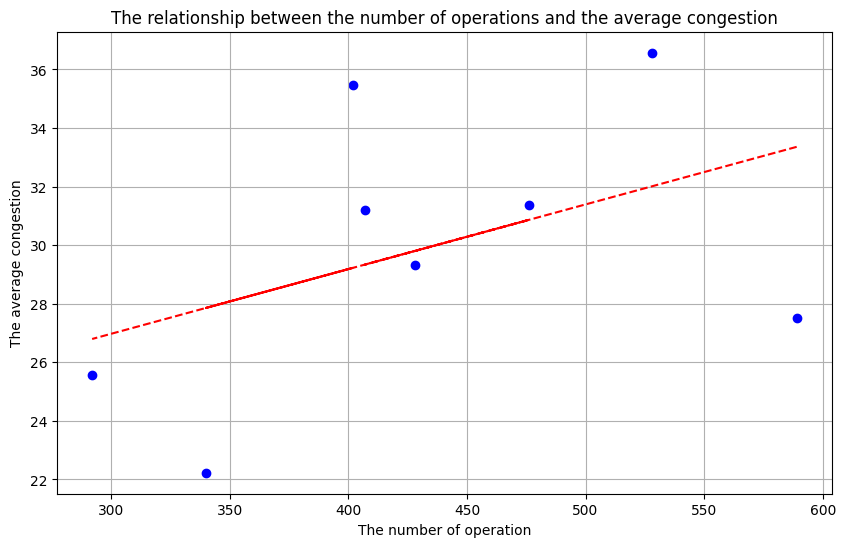

In [15]:
plt.figure(figsize=(10, 6))

# 점 그래프
plt.scatter(df_3['Number_Operaion'], df_3['Average_Congestion'], color='blue', marker='o')

# 추세선
z = np.polyfit(df_3['Number_Operaion'], df_3['Average_Congestion'], 1)
p = np.poly1d(z)
plt.plot(df_3['Number_Operaion'], p(df_3['Number_Operaion']), "r--")

plt.title('The relationship between the number of operations and the average congestion')
plt.xlabel('The number of operation')
plt.ylabel('The average congestion')
plt.grid(True)
plt.show()

분석: 운행 횟수가 높은 열차일수록 빠르게 교통량 해소할 것 이라 생각해 가설을 설정했다. 분석 결과 운행횟수에 따라 평균 혼잡도도 증가하는 추세를 보였다.

> # 5. 결론
### '출근 시간대의 열차 운행시격이 늘어날수록 혼잡도가 늘어날 것이다.'
- 운행시격과 혼잡도와는 오히려 음의 상관관계를 가지며 이는 각 호선들의 통근 인구가 다르기 때문이라고 추측한다. 또한 [기사 1]에 따르면 출근 시간대에 혼잡한 지하철 노선은 4호선과 7호선이라고 하는데, 두 노선의 운행시격이 2.5로 가장 작다. 따라서 혼잡도가 높은 열차의 운행시격을 줄였지만 운행시격이 적은 노선이 혼잡도가 아직도 높다고 추측한다.
32\~34km/h의 평균속도를 가지는 노선 5개가 26~37%의 다양한 평균 혼잡도를 가지기 때문에 표정속도는 혼잡도와 무관하다고 판단된다.

### '표정 속도가 커질수록 혼잡도가 줄어들 것이다.'
- 32\~34km/h의 평균속도를 가지는 노선 5개가 26~37%의 다양한 평균 혼잡도를 가지기 때문에 표정속도는 혼잡도와 무관하다고 판단된다.

### '평일 운행 횟수가 커질수록 혼잡도가 줄어들 것이다.'
- 오히려 양의 상관관계를 가지는 추세를 보였는데, 이 또한 반대로 혼잡도가 높은 호선을 운행을 늘린것이 아닐까 추측한다.

### 최종결론
- 따라서 표정속도는 혼잡도와 유의미한 관계를 보이지 않았고, 운행시격과 운행횟수는 예상했던 결과와 정반대의 분석결과를 보였다. 하지만 [기사 1]을 통해 혼잡도가 높은 노선에 운행횟수와 운행시격을 조절했기 때문이라는 추측을 할 수 있었다. 앞으로 이런식으로 데이터 분석을 통해 혼잡도에 영향을 미치는 요인을 찾고 가장 적합한 해결책을 고안해내고 싶다.

> # 6. 참고 문헌
+ [기사 1] [혼잡도 높은 서울 지하철 4·7·9호선, 출퇴근 시간 운행 늘린다](https://www.chosun.com/national/regional/seoul/2023/10/06/VJ2EFCO7GVE2JNLDVM5O5EDONU/) - 조선일보(2023.10.10)